In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2) Change the minimum length in apriori algorithm
3) Visulize the obtained rules using different plots 

In [2]:
data=pd.read_csv('book_item.csv')
data

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [3]:
data.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [4]:
data.tail()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0
1999,0,0,0,0,0,0,0,0,0,0,0


In [5]:
data.shape

(2000, 11)

In [6]:
data.columns

Index(['ChildBks', 'YouthBks', 'CookBks', 'DoItYBks', 'RefBks', 'ArtBks',
       'GeogBks', 'ItalCook', 'ItalAtlas', 'ItalArt', 'Florence'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [8]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996     True
1997     True
1998     True
1999     True
Length: 2000, dtype: bool

In [9]:
data[data.duplicated()]

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
10,0,0,0,0,0,0,0,0,0,0,0
11,0,0,1,0,0,0,1,0,0,0,0
12,1,0,0,0,0,1,0,0,0,0,1
15,1,1,1,0,0,0,1,0,0,0,0
17,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1994,0,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [10]:
data.drop_duplicates(inplace=True)
data

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1956,1,0,1,0,1,0,0,0,1,0,0
1959,1,1,1,1,1,1,1,1,0,1,0
1960,1,0,1,1,1,0,0,1,1,0,1
1983,1,1,1,0,1,1,0,1,1,1,0


In [11]:
data.isnull()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1956,False,False,False,False,False,False,False,False,False,False,False
1959,False,False,False,False,False,False,False,False,False,False,False
1960,False,False,False,False,False,False,False,False,False,False,False
1983,False,False,False,False,False,False,False,False,False,False,False


In [12]:
data.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

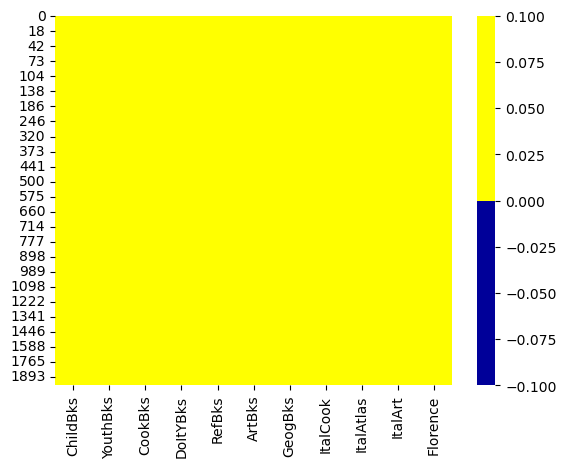

In [13]:
colours = ['#000099', '#ffff00'] 
pal = sns.color_palette(colours)
sns.heatmap(data.isnull(), cmap=pal)
plt.show()

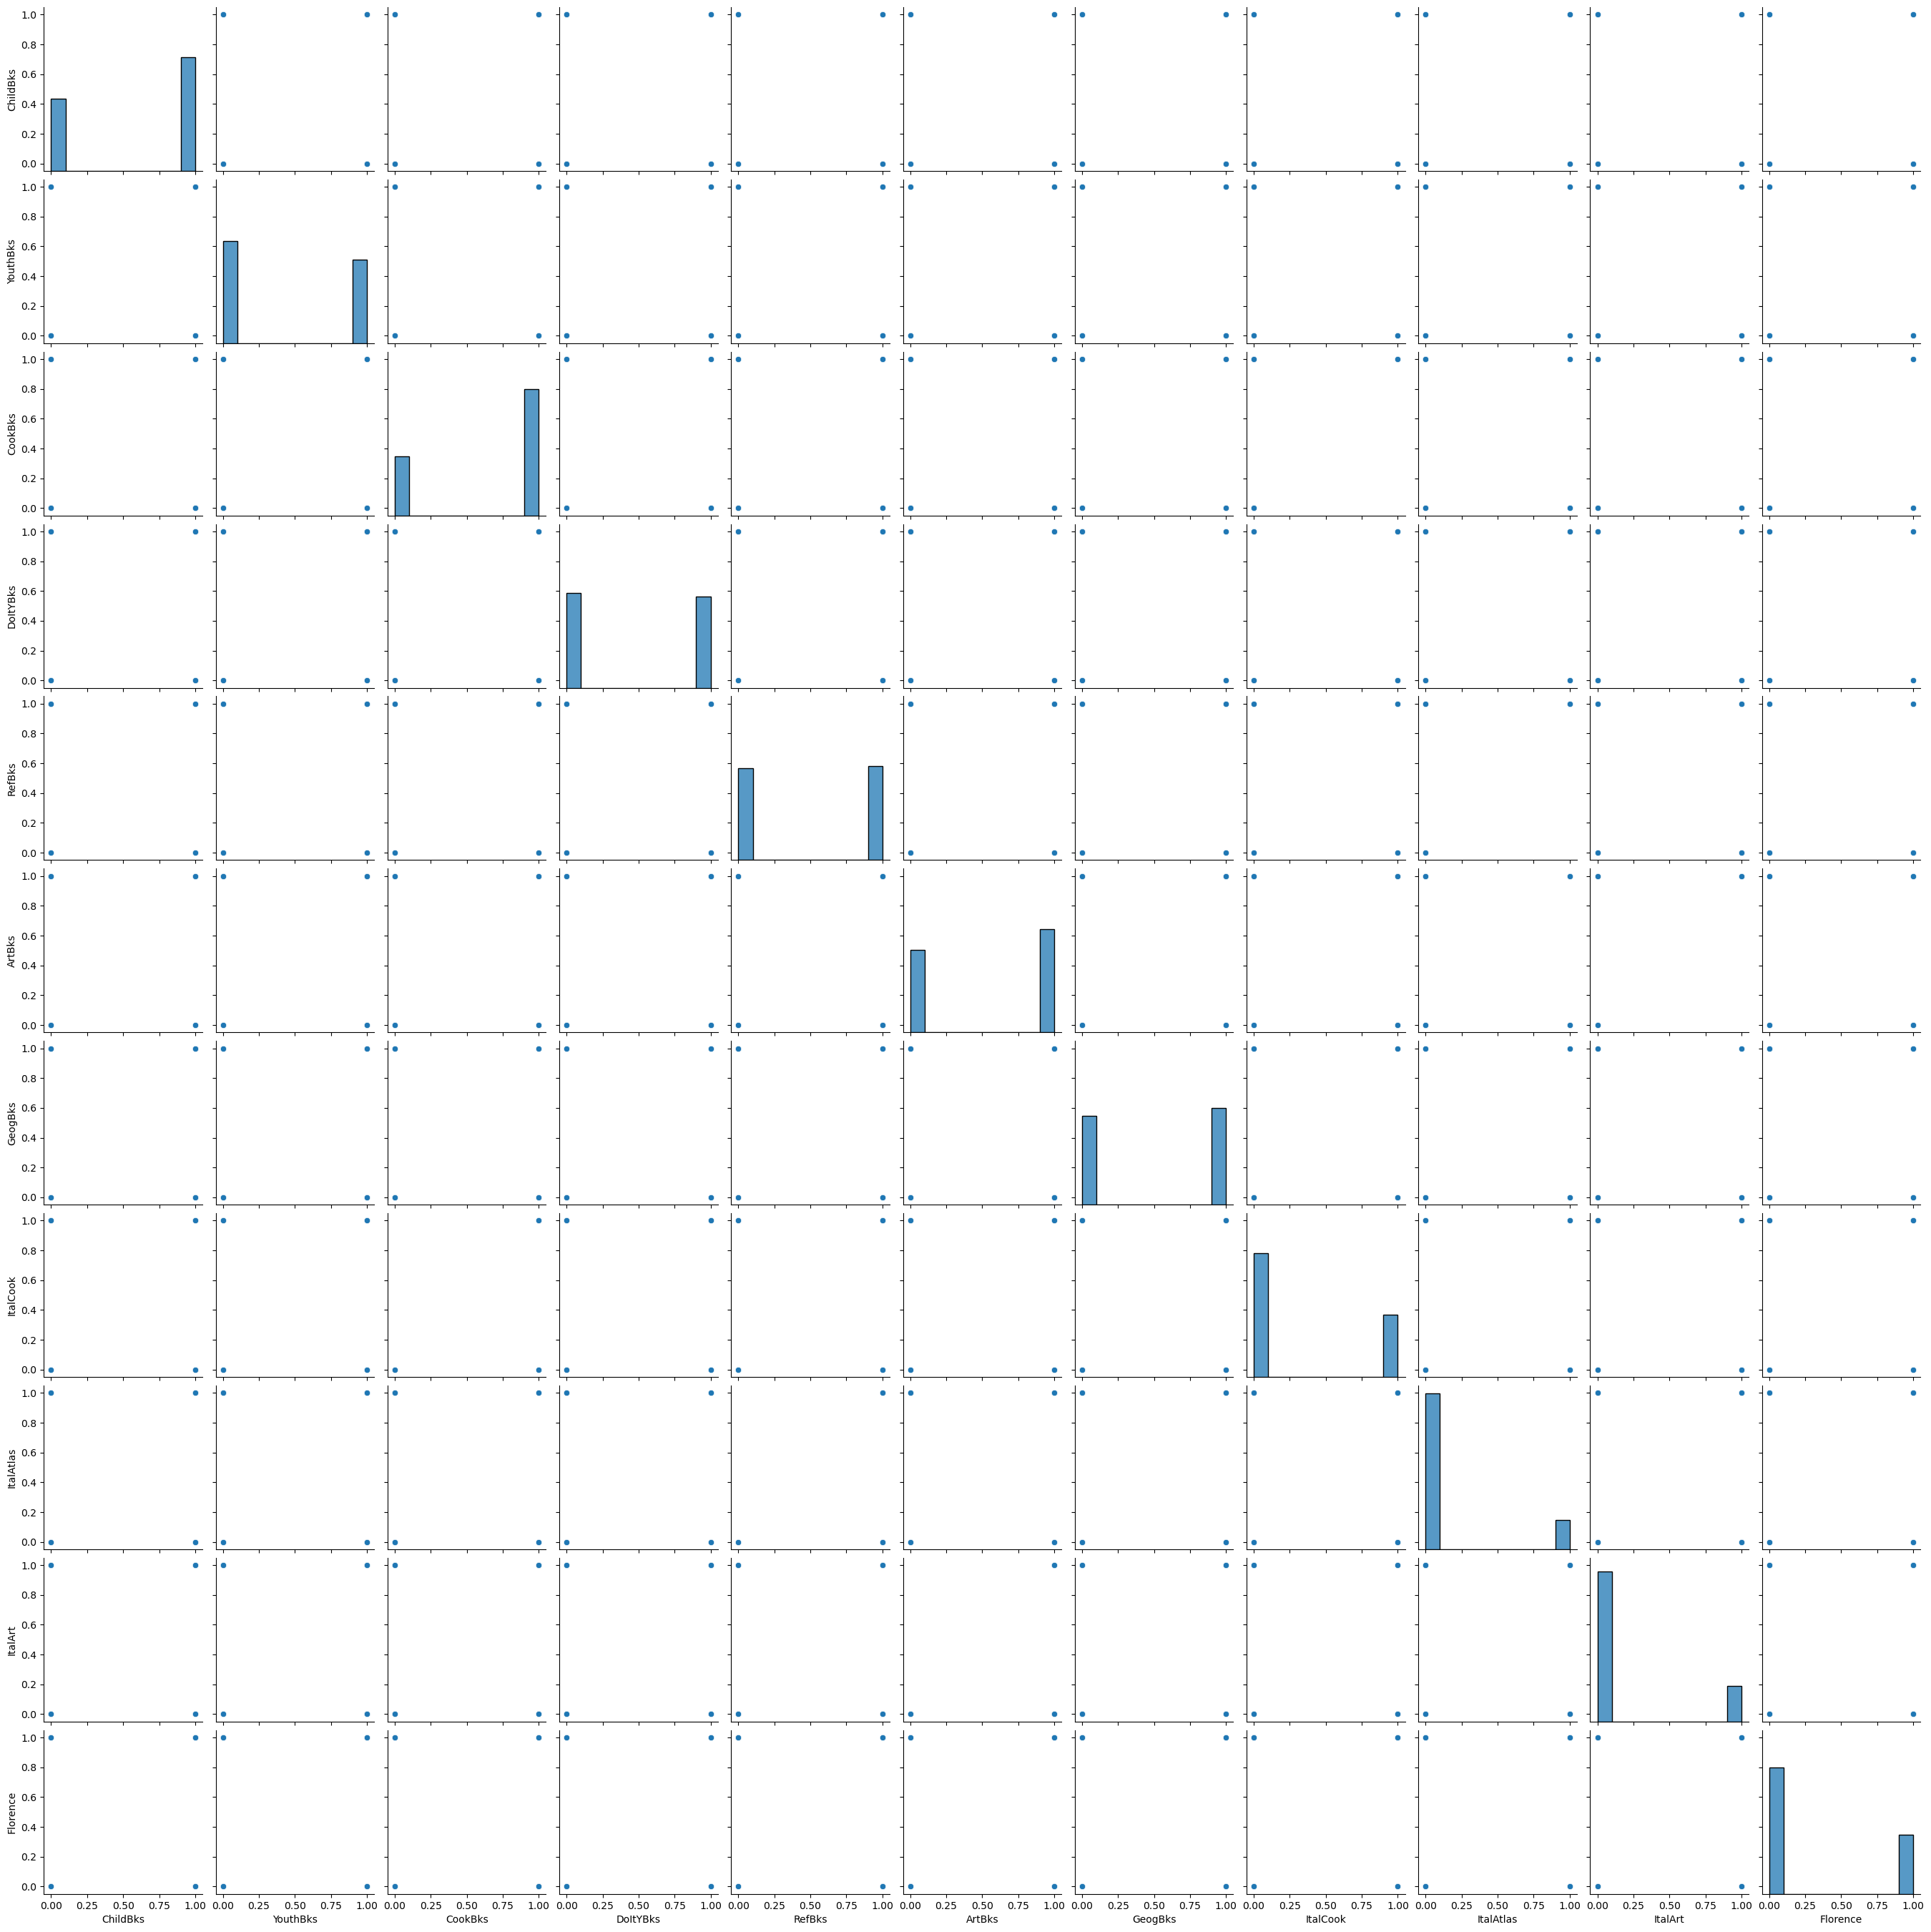

In [14]:
sns.pairplot(data=data)
plt.show()

In [15]:
data.corr()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
ChildBks,1.000000,0.100570,0.089130,0.062071,0.125413,0.102965,0.099038,0.169447,0.100986,0.108393,0.020992
YouthBks,0.100570,1.000000,0.066051,-0.008167,0.064076,0.011379,-0.001886,0.077891,0.018019,0.040779,-0.093011
CookBks,0.089130,0.066051,1.000000,0.040831,0.035378,0.023453,0.029955,0.484813,0.023016,0.092941,-0.007016
DoItYBks,0.062071,-0.008167,0.040831,1.000000,0.006486,0.071325,-0.036721,0.033167,-0.000374,0.048887,-0.027416
RefBks,0.125413,0.064076,0.035378,0.006486,1.000000,-0.064320,0.005709,0.024262,0.430011,-0.029936,-0.048791
ArtBks,0.102965,0.011379,0.023453,0.071325,-0.064320,1.000000,0.039114,0.033081,-0.057890,0.433460,0.125025
GeogBks,0.099038,-0.001886,0.029955,-0.036721,0.005709,0.039114,1.000000,0.028635,-0.010522,0.034492,0.117721
ItalCook,0.169447,0.077891,0.484813,0.033167,0.024262,0.033081,0.028635,1.000000,0.198106,0.347445,-0.058369
ItalAtlas,0.100986,0.018019,0.023016,-0.000374,0.430011,-0.057890,-0.010522,0.198106,1.000000,0.266874,-0.077981
ItalArt,0.108393,0.040779,0.092941,0.048887,-0.029936,0.433460,0.034492,0.347445,0.266874,1.000000,0.009497


[]

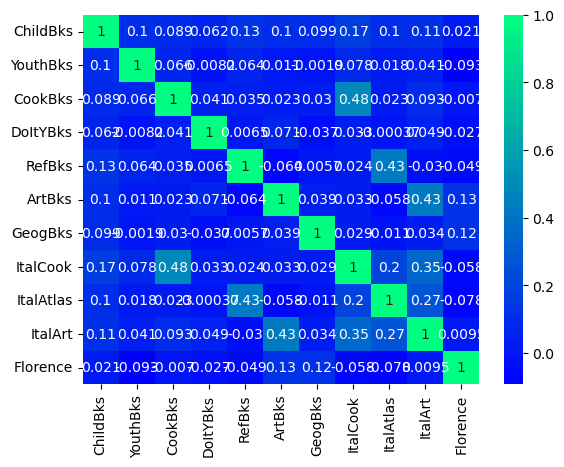

In [16]:
sns.heatmap(data.corr(), cmap='winter', annot=True)
plt.plot()

In [17]:
data.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,0.612500,0.450000,0.681250,0.490625,0.506250,0.556250,0.521875,0.334375,0.159375,0.190625,0.318750
std,0.487942,0.498273,0.466722,0.500695,0.500744,0.497604,0.500304,0.472510,0.366599,0.393409,0.466722
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


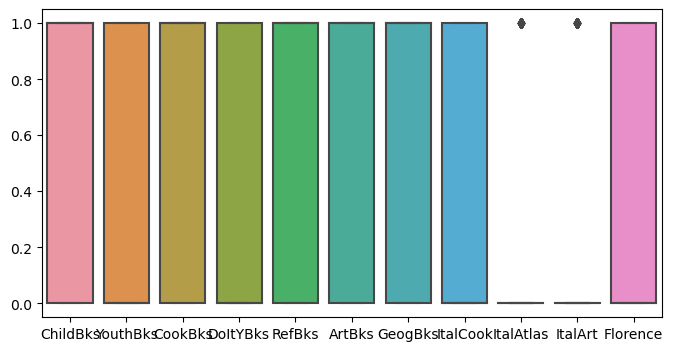

In [18]:
plt.figure(figsize=(8,4))
box = sns.boxplot(data = data)
plt.show()

### Create frequent datasets

In [19]:
from mlxtend.frequent_patterns import apriori

In [20]:
frequent_itemsets = apriori(data,min_support=0.1,use_colnames=True)
frequent_itemsets

C:\Users\sreen\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.612500,(ChildBks)
1,0.450000,(YouthBks)
2,0.681250,(CookBks)
3,0.490625,(DoItYBks)
4,0.506250,(RefBks)
...,...,...
152,0.106250,"(CookBks, DoItYBks, GeogBks, ArtBks)"
153,0.106250,"(CookBks, DoItYBks, ItalCook, ArtBks)"
154,0.103125,"(RefBks, CookBks, GeogBks, ArtBks)"
155,0.112500,"(CookBks, ItalCook, GeogBks, ArtBks)"


#### From frequent itemsets extract the association rules

In [21]:
from mlxtend.frequent_patterns import association_rules

In [22]:
assoc_rules=association_rules(frequent_itemsets,min_threshold=1.0)
assoc_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ItalCook),(CookBks),0.334375,0.681250,0.334375,1.0,1.467890,0.106582,inf,0.478873
1,(ItalAtlas),(RefBks),0.159375,0.506250,0.159375,1.0,1.975309,0.078691,inf,0.587361
2,(ItalArt),(ArtBks),0.190625,0.556250,0.190625,1.0,1.797753,0.084590,inf,0.548263
3,"(ChildBks, ItalCook)",(CookBks),0.243750,0.681250,0.243750,1.0,1.467890,0.077695,inf,0.421488
4,"(ItalAtlas, ChildBks)",(RefBks),0.115625,0.506250,0.115625,1.0,1.975309,0.057090,inf,0.558304
5,"(ItalArt, ChildBks)",(ArtBks),0.137500,0.556250,0.137500,1.0,1.797753,0.061016,inf,0.514493
6,"(ItalCook, YouthBks)",(CookBks),0.168750,0.681250,0.168750,1.0,1.467890,0.053789,inf,0.383459
7,"(DoItYBks, ItalCook)",(CookBks),0.171875,0.681250,0.171875,1.0,1.467890,0.054785,inf,0.384906
8,"(RefBks, ItalCook)",(CookBks),0.175000,0.681250,0.175000,1.0,1.467890,0.055781,inf,0.386364
9,"(ItalAtlas, CookBks)",(RefBks),0.112500,0.506250,0.112500,1.0,1.975309,0.055547,inf,0.556338


In [23]:
assoc_rules[assoc_rules['lift'] > 1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ItalCook),(CookBks),0.334375,0.681250,0.334375,1.0,1.467890,0.106582,inf,0.478873
1,(ItalAtlas),(RefBks),0.159375,0.506250,0.159375,1.0,1.975309,0.078691,inf,0.587361
2,(ItalArt),(ArtBks),0.190625,0.556250,0.190625,1.0,1.797753,0.084590,inf,0.548263
3,"(ChildBks, ItalCook)",(CookBks),0.243750,0.681250,0.243750,1.0,1.467890,0.077695,inf,0.421488
4,"(ItalAtlas, ChildBks)",(RefBks),0.115625,0.506250,0.115625,1.0,1.975309,0.057090,inf,0.558304
5,"(ItalArt, ChildBks)",(ArtBks),0.137500,0.556250,0.137500,1.0,1.797753,0.061016,inf,0.514493
6,"(ItalCook, YouthBks)",(CookBks),0.168750,0.681250,0.168750,1.0,1.467890,0.053789,inf,0.383459
7,"(DoItYBks, ItalCook)",(CookBks),0.171875,0.681250,0.171875,1.0,1.467890,0.054785,inf,0.384906
8,"(RefBks, ItalCook)",(CookBks),0.175000,0.681250,0.175000,1.0,1.467890,0.055781,inf,0.386364
9,"(ItalAtlas, CookBks)",(RefBks),0.112500,0.506250,0.112500,1.0,1.975309,0.055547,inf,0.556338


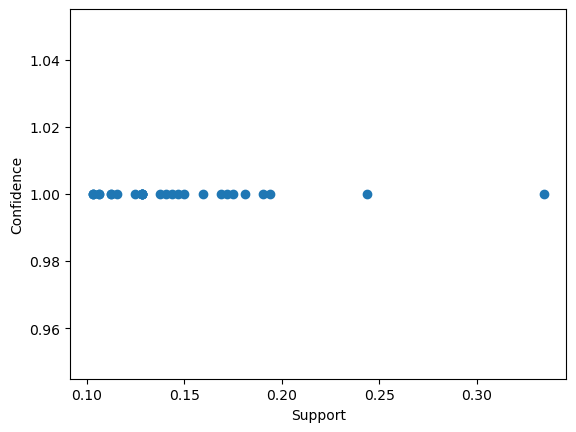

In [24]:
import matplotlib.pyplot as plt
plt.scatter(assoc_rules['support'],assoc_rules['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

In [25]:
assoc_rules[assoc_rules['lift'] > 2]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
28,"(ItalArt, ItalCook)","(CookBks, ArtBks)",0.128125,0.384375,0.128125,1.0,2.601626,0.078877,inf,0.706093


In [26]:
assoc_rules1=association_rules(frequent_itemsets,metric = 'lift' ,min_threshold=0.9)

In [37]:
assoc_rules1[assoc_rules1['lift']>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(YouthBks),0.612500,0.450000,0.300000,0.489796,1.088435,0.024375,1.078000,0.209677
1,(YouthBks),(ChildBks),0.450000,0.612500,0.300000,0.666667,1.088435,0.024375,1.162500,0.147727
2,(ChildBks),(CookBks),0.612500,0.681250,0.437500,0.714286,1.048493,0.020234,1.115625,0.119355
3,(CookBks),(ChildBks),0.681250,0.612500,0.437500,0.642202,1.048493,0.020234,1.083013,0.145098
4,(ChildBks),(DoItYBks),0.612500,0.490625,0.315625,0.515306,1.050305,0.015117,1.050921,0.123603
...,...,...,...,...,...,...,...,...,...,...
949,"(ItalCook, ArtBks)","(ItalArt, CookBks)",0.193750,0.146875,0.128125,0.661290,4.502402,0.099668,2.518750,0.964833
950,(ItalArt),"(CookBks, ItalCook, ArtBks)",0.190625,0.193750,0.128125,0.672131,3.469064,0.091191,2.459062,0.879367
951,(CookBks),"(ItalArt, ItalCook, ArtBks)",0.681250,0.128125,0.128125,0.188073,1.467890,0.040840,1.073835,1.000000
952,(ItalCook),"(ItalArt, CookBks, ArtBks)",0.334375,0.146875,0.128125,0.383178,2.608869,0.079014,1.383097,0.926486


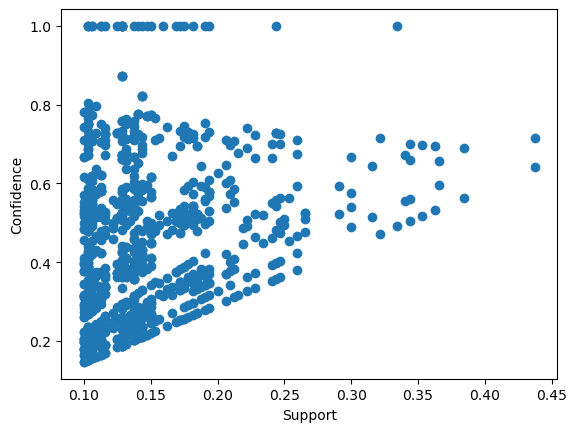

In [33]:
import matplotlib.pyplot as plt
plt.scatter(assoc_rules1['support'],assoc_rules1['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

In [29]:
frequent_itemsets.sort_values('support',ascending=False)

,support,itemsets
2,0.681250,(CookBks)
0,0.612500,(ChildBks)
5,0.556250,(ArtBks)
6,0.521875,(GeogBks)
4,0.506250,(RefBks)
...,...,...
72,0.100000,"(Florence, ChildBks, DoItYBks)"
149,0.100000,"(RefBks, CookBks, ArtBks, YouthBks)"
146,0.100000,"(RefBks, ChildBks, DoItYBks, ArtBks)"
120,0.100000,"(RefBks, Florence, ArtBks)"


In [30]:
frequent_itemsets1= apriori(data,min_support=0.2,use_colnames=True)
frequent_itemsets1

C:\Users\sreen\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.612500,(ChildBks)
1,0.450000,(YouthBks)
2,0.681250,(CookBks)
3,0.490625,(DoItYBks)
4,0.506250,(RefBks)
5,0.556250,(ArtBks)
6,0.521875,(GeogBks)
7,0.334375,(ItalCook)
8,0.318750,(Florence)
9,0.300000,"(ChildBks, YouthBks)"


In [46]:
assoc_rules2=association_rules(frequent_itemsets,metric = 'confidence' ,min_threshold=0.4)
assoc_rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(YouthBks),0.612500,0.450000,0.300000,0.489796,1.088435,0.024375,1.078000,0.209677
1,(YouthBks),(ChildBks),0.450000,0.612500,0.300000,0.666667,1.088435,0.024375,1.162500,0.147727
2,(ChildBks),(CookBks),0.612500,0.681250,0.437500,0.714286,1.048493,0.020234,1.115625,0.119355
3,(CookBks),(ChildBks),0.681250,0.612500,0.437500,0.642202,1.048493,0.020234,1.083013,0.145098
4,(ChildBks),(DoItYBks),0.612500,0.490625,0.315625,0.515306,1.050305,0.015117,1.050921,0.123603
...,...,...,...,...,...,...,...,...,...,...
487,"(ItalArt, CookBks)","(ItalCook, ArtBks)",0.146875,0.193750,0.128125,0.872340,4.502402,0.099668,6.315625,0.911820
488,"(ItalArt, ItalCook)","(CookBks, ArtBks)",0.128125,0.384375,0.128125,1.000000,2.601626,0.078877,inf,0.706093
489,"(ItalArt, ArtBks)","(CookBks, ItalCook)",0.190625,0.334375,0.128125,0.672131,2.010112,0.064385,2.030156,0.620868
490,"(ItalCook, ArtBks)","(ItalArt, CookBks)",0.193750,0.146875,0.128125,0.661290,4.502402,0.099668,2.518750,0.964833


In [47]:
assoc_rules2[assoc_rules2['lift']>3]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
287,"(ItalCook, ArtBks)",(ItalArt),0.193750,0.190625,0.128125,0.661290,3.469064,0.091191,2.389583,0.882776
288,(ItalArt),"(ItalCook, ArtBks)",0.190625,0.193750,0.128125,0.672131,3.469064,0.091191,2.459062,0.879367
486,"(CookBks, ItalCook, ArtBks)",(ItalArt),0.193750,0.190625,0.128125,0.661290,3.469064,0.091191,2.389583,0.882776
487,"(ItalArt, CookBks)","(ItalCook, ArtBks)",0.146875,0.193750,0.128125,0.872340,4.502402,0.099668,6.315625,0.911820
490,"(ItalCook, ArtBks)","(ItalArt, CookBks)",0.193750,0.146875,0.128125,0.661290,4.502402,0.099668,2.518750,0.964833
491,(ItalArt),"(CookBks, ItalCook, ArtBks)",0.190625,0.193750,0.128125,0.672131,3.469064,0.091191,2.459062,0.879367


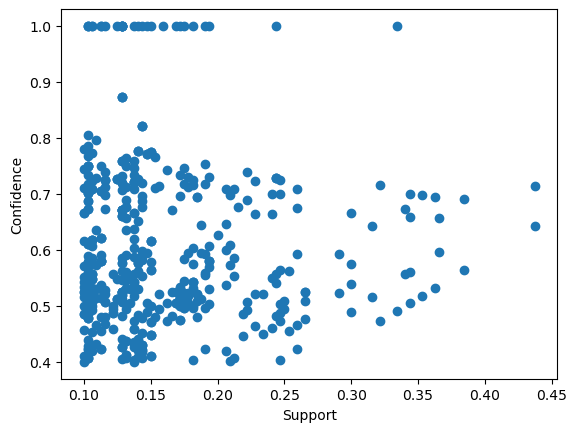

In [48]:
import matplotlib.pyplot as plt
plt.scatter(assoc_rules2['support'],assoc_rules2['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

# ********************************************************************************************************************************

In [90]:
data1=pd.read_csv('my_movies.csv')
data1

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [91]:
data1.shape

(10, 15)

In [92]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [93]:
data1.duplicated()

0    False
1    False
2    False
3    False
4     True
5     True
6    False
7    False
8     True
9    False
dtype: bool

In [94]:
data1[data1.duplicated()]

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [95]:
data1.drop_duplicates(inplace=True)
data1

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [127]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/34/ac/72a4e42e76bf549dfd91791a6b10a9832f046c1d48b5e778be9ec012aa47/wordcloud-1.9.2-cp311-cp311-win_amd64.whl.metadata
Using cached wordcloud-1.9.2-cp311-cp311-win_amd64.whl (151 kB)


In [128]:
from wordcloud import WordCloud

In [133]:
movie_titles = ['Sixth Sense','Gladiator','LOTR1','Harry Potter1','Patriot','LOTR2','Harry Potter2','LOTR','Braveheart','Green Mile']

C:\Users\sreen\anaconda3\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


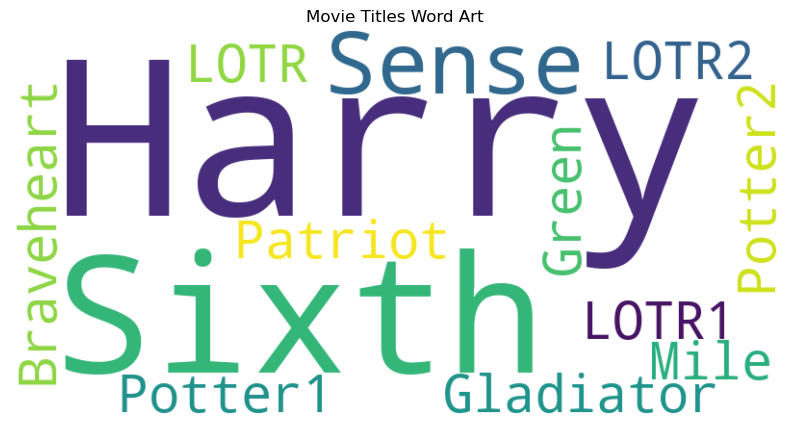

In [134]:

text = ' '.join(movie_titles) # Convert the list to a single string
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Movie Titles Word Art")
plt.show()

In [96]:
data1.shape

(7, 15)

In [97]:
data1.reset_index(drop=True,inplace=True)
data1.shape

(7, 15)

In [98]:
data1.isnull()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
2,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
4,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False
5,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


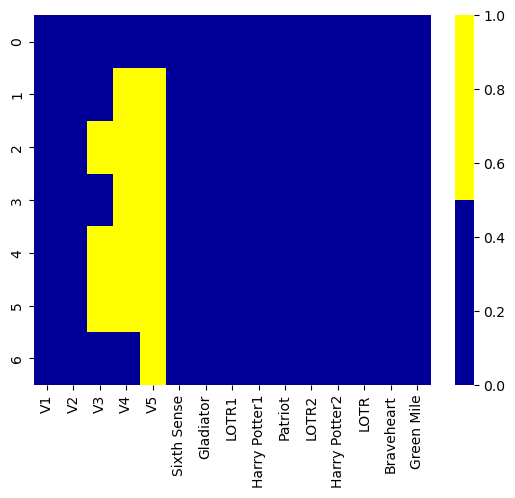

In [99]:
colours = ['#000099', '#ffff00'] 
pal = sns.color_palette(colours)
sns.heatmap(data1.isnull(), cmap=pal)
plt.show()

In [100]:
data1.isnull().sum()

V1               0
V2               0
V3               3
V4               5
V5               6
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [101]:
columns_drop=['V1','V2','V3','V4','V5']

In [102]:
data1.drop(columns=columns_drop,axis=1,inplace=True)

In [103]:
data1

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0
5,0,1,0,0,1,0,0,0,0,0
6,1,1,0,0,0,0,0,1,0,1


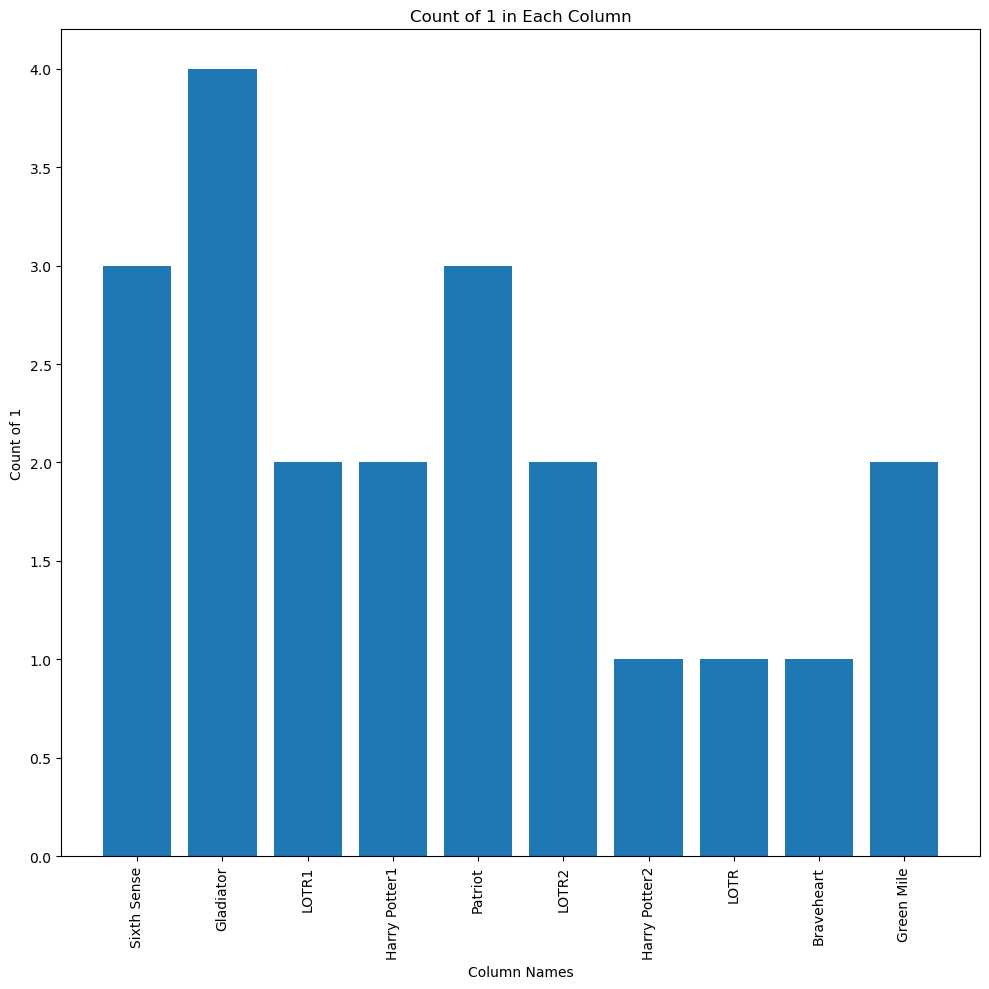

In [105]:
movie_count = []
col_names = data1.columns
for col_name in col_names:
    count = (data1[col_name] == 1).sum()
    movie_count.append(count)
plt.figure(figsize=(10, 10))
plt.bar(col_names, movie_count)
plt.xlabel('Column Names')
plt.ylabel('Count of 1')
plt.title('Count of 1 in Each Column')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()

In [107]:
freq_moviesets=apriori(data1,min_support=0.1,use_colnames=True)
freq_moviesets

C:\Users\sreen\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.428571,(Sixth Sense)
1,0.571429,(Gladiator)
2,0.285714,(LOTR1)
3,0.285714,(Harry Potter1)
4,0.428571,(Patriot)
5,0.285714,(LOTR2)
6,0.142857,(Harry Potter2)
7,0.142857,(LOTR)
8,0.142857,(Braveheart)
9,0.285714,(Green Mile)


In [110]:
assoc_rules=association_rules(freq_moviesets,min_threshold=0.5)
assoc_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.571429,0.428571,0.285714,0.500000,1.166667,0.040816,1.142857,0.333333
1,(Sixth Sense),(Gladiator),0.428571,0.571429,0.285714,0.666667,1.166667,0.040816,1.285714,0.250000
2,(LOTR1),(Sixth Sense),0.285714,0.428571,0.142857,0.500000,1.166667,0.020408,1.142857,0.200000
3,(Harry Potter1),(Sixth Sense),0.285714,0.428571,0.142857,0.500000,1.166667,0.020408,1.142857,0.200000
4,(LOTR2),(Sixth Sense),0.285714,0.428571,0.142857,0.500000,1.166667,0.020408,1.142857,0.200000
...,...,...,...,...,...,...,...,...,...,...
209,"(Green Mile, LOTR1)","(LOTR2, Harry Potter1, Sixth Sense)",0.142857,0.142857,0.142857,1.000000,7.000000,0.122449,inf,1.000000
210,(Harry Potter1),"(LOTR2, Green Mile, LOTR1, Sixth Sense)",0.285714,0.142857,0.142857,0.500000,3.500000,0.102041,1.714286,1.000000
211,(LOTR2),"(Green Mile, LOTR1, Harry Potter1, Sixth Sense)",0.285714,0.142857,0.142857,0.500000,3.500000,0.102041,1.714286,1.000000
212,(Green Mile),"(LOTR2, LOTR1, Harry Potter1, Sixth Sense)",0.285714,0.142857,0.142857,0.500000,3.500000,0.102041,1.714286,1.000000


In [111]:
assoc_rules1 = association_rules(frequent_itemsets1, metric="lift", min_threshold=1)
assoc_rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(YouthBks),0.612500,0.450000,0.300000,0.489796,1.088435,0.024375,1.078000,0.209677
1,(YouthBks),(ChildBks),0.450000,0.612500,0.300000,0.666667,1.088435,0.024375,1.162500,0.147727
2,(ChildBks),(CookBks),0.612500,0.681250,0.437500,0.714286,1.048493,0.020234,1.115625,0.119355
3,(CookBks),(ChildBks),0.681250,0.612500,0.437500,0.642202,1.048493,0.020234,1.083013,0.145098
4,(ChildBks),(DoItYBks),0.612500,0.490625,0.315625,0.515306,1.050305,0.015117,1.050921,0.123603
...,...,...,...,...,...,...,...,...,...,...
91,"(CookBks, ArtBks)",(GeogBks),0.384375,0.521875,0.212500,0.552846,1.059345,0.011904,1.069261,0.090997
92,"(GeogBks, ArtBks)",(CookBks),0.300000,0.681250,0.212500,0.708333,1.039755,0.008125,1.092857,0.054622
93,(CookBks),"(GeogBks, ArtBks)",0.681250,0.300000,0.212500,0.311927,1.039755,0.008125,1.017333,0.119954
94,(GeogBks),"(CookBks, ArtBks)",0.521875,0.384375,0.212500,0.407186,1.059345,0.011904,1.038479,0.117166


In [113]:
assoc_rules1 = assoc_rules1.sort_values(['confidence', 'lift','support'], ascending =[False, False,False])
assoc_rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
31,(ItalCook),(CookBks),0.334375,0.681250,0.334375,1.000000,1.467890,0.106582,inf,0.478873
73,"(ChildBks, ItalCook)",(CookBks),0.243750,0.681250,0.243750,1.000000,1.467890,0.077695,inf,0.421488
43,"(ChildBks, YouthBks)",(CookBks),0.300000,0.681250,0.221875,0.739583,1.085627,0.017500,1.224000,0.112676
77,(ItalCook),"(ChildBks, CookBks)",0.334375,0.437500,0.243750,0.728972,1.666222,0.097461,2.075431,0.600698
13,(ItalCook),(ChildBks),0.334375,0.612500,0.243750,0.728972,1.190158,0.038945,1.429741,0.240039
...,...,...,...,...,...,...,...,...,...,...
52,(CookBks),"(ChildBks, DoItYBks)",0.681250,0.315625,0.228125,0.334862,1.060950,0.013105,1.028922,0.180231
15,(ChildBks),(Florence),0.612500,0.318750,0.200000,0.326531,1.024410,0.004766,1.011553,0.061492
46,(CookBks),"(ChildBks, YouthBks)",0.681250,0.300000,0.221875,0.325688,1.085627,0.017500,1.038095,0.247445
93,(CookBks),"(GeogBks, ArtBks)",0.681250,0.300000,0.212500,0.311927,1.039755,0.008125,1.017333,0.119954


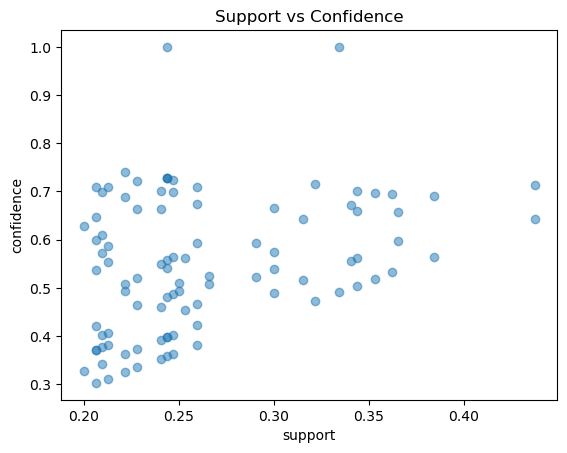

In [114]:
plt.scatter(assoc_rules1['support'], assoc_rules1['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

In [115]:
assoc_rules2 = association_rules(freq_moviesets, metric="confidence", min_threshold=0.5)
assoc_rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.571429,0.428571,0.285714,0.500000,1.166667,0.040816,1.142857,0.333333
1,(Sixth Sense),(Gladiator),0.428571,0.571429,0.285714,0.666667,1.166667,0.040816,1.285714,0.250000
2,(LOTR1),(Sixth Sense),0.285714,0.428571,0.142857,0.500000,1.166667,0.020408,1.142857,0.200000
3,(Harry Potter1),(Sixth Sense),0.285714,0.428571,0.142857,0.500000,1.166667,0.020408,1.142857,0.200000
4,(LOTR2),(Sixth Sense),0.285714,0.428571,0.142857,0.500000,1.166667,0.020408,1.142857,0.200000
...,...,...,...,...,...,...,...,...,...,...
209,"(Green Mile, LOTR1)","(LOTR2, Harry Potter1, Sixth Sense)",0.142857,0.142857,0.142857,1.000000,7.000000,0.122449,inf,1.000000
210,(Harry Potter1),"(LOTR2, Green Mile, LOTR1, Sixth Sense)",0.285714,0.142857,0.142857,0.500000,3.500000,0.102041,1.714286,1.000000
211,(LOTR2),"(Green Mile, LOTR1, Harry Potter1, Sixth Sense)",0.285714,0.142857,0.142857,0.500000,3.500000,0.102041,1.714286,1.000000
212,(Green Mile),"(LOTR2, LOTR1, Harry Potter1, Sixth Sense)",0.285714,0.142857,0.142857,0.500000,3.500000,0.102041,1.714286,1.000000


In [116]:
assoc_rules2 = assoc_rules2.sort_values(['confidence', 'lift'], ascending =[False, False])
assoc_rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
80,"(Green Mile, Gladiator)",(LOTR),0.142857,0.142857,0.142857,1.0,7.000000,0.122449,inf,1.000000
81,(LOTR),"(Green Mile, Gladiator)",0.142857,0.142857,0.142857,1.0,7.000000,0.122449,inf,1.000000
109,"(Green Mile, Sixth Sense, Gladiator)",(LOTR),0.142857,0.142857,0.142857,1.0,7.000000,0.122449,inf,1.000000
112,"(Green Mile, Gladiator)","(LOTR, Sixth Sense)",0.142857,0.142857,0.142857,1.0,7.000000,0.122449,inf,1.000000
115,"(LOTR, Sixth Sense)","(Green Mile, Gladiator)",0.142857,0.142857,0.142857,1.0,7.000000,0.122449,inf,1.000000
...,...,...,...,...,...,...,...,...,...,...
4,(LOTR2),(Sixth Sense),0.285714,0.428571,0.142857,0.5,1.166667,0.020408,1.142857,0.200000
30,"(Sixth Sense, Gladiator)",(Patriot),0.285714,0.428571,0.142857,0.5,1.166667,0.020408,1.142857,0.200000
45,"(LOTR2, LOTR1)",(Sixth Sense),0.285714,0.428571,0.142857,0.5,1.166667,0.020408,1.142857,0.200000
12,(Green Mile),(Gladiator),0.285714,0.571429,0.142857,0.5,0.875000,-0.020408,0.857143,-0.166667


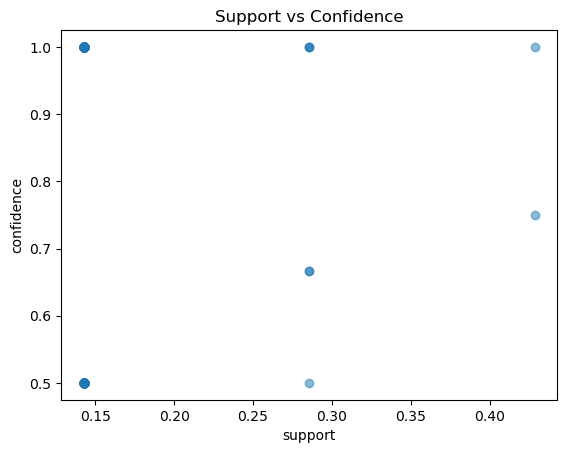

In [117]:
plt.scatter(assoc_rules2['support'], assoc_rules2['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

In [118]:
frequent_moviesets2 = apriori(data, min_support=0.2, use_colnames=True)
frequent_moviesets2

C:\Users\sreen\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.612500,(ChildBks)
1,0.450000,(YouthBks)
2,0.681250,(CookBks)
3,0.490625,(DoItYBks)
4,0.506250,(RefBks)
5,0.556250,(ArtBks)
6,0.521875,(GeogBks)
7,0.334375,(ItalCook)
8,0.318750,(Florence)
9,0.300000,"(ChildBks, YouthBks)"


In [119]:
assoc_rules3 = association_rules(frequent_moviesets2, metric="lift", min_threshold=0.1)
assoc_rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(YouthBks),0.612500,0.450000,0.300000,0.489796,1.088435,0.024375,1.078000,0.209677
1,(YouthBks),(ChildBks),0.450000,0.612500,0.300000,0.666667,1.088435,0.024375,1.162500,0.147727
2,(ChildBks),(CookBks),0.612500,0.681250,0.437500,0.714286,1.048493,0.020234,1.115625,0.119355
3,(CookBks),(ChildBks),0.681250,0.612500,0.437500,0.642202,1.048493,0.020234,1.083013,0.145098
4,(ChildBks),(DoItYBks),0.612500,0.490625,0.315625,0.515306,1.050305,0.015117,1.050921,0.123603
...,...,...,...,...,...,...,...,...,...,...
101,"(CookBks, ArtBks)",(GeogBks),0.384375,0.521875,0.212500,0.552846,1.059345,0.011904,1.069261,0.090997
102,"(GeogBks, ArtBks)",(CookBks),0.300000,0.681250,0.212500,0.708333,1.039755,0.008125,1.092857,0.054622
103,(CookBks),"(GeogBks, ArtBks)",0.681250,0.300000,0.212500,0.311927,1.039755,0.008125,1.017333,0.119954
104,(GeogBks),"(CookBks, ArtBks)",0.521875,0.384375,0.212500,0.407186,1.059345,0.011904,1.038479,0.117166


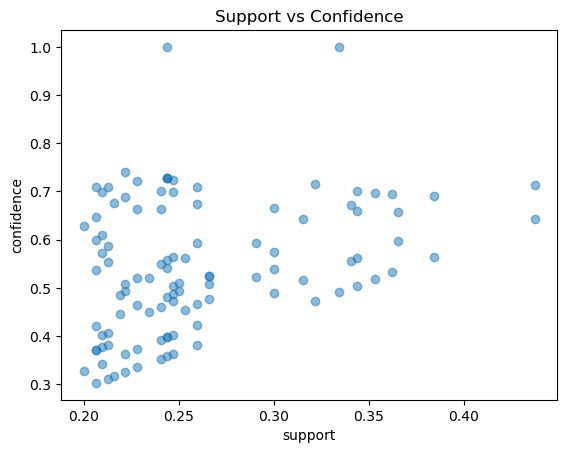

In [120]:
plt.scatter(assoc_rules3['support'], assoc_rules3['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

In [121]:
assoc_rules4 = association_rules(frequent_moviesets2, metric="confidence", min_threshold=0.5)
assoc_rules4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.450000,0.612500,0.300000,0.666667,1.088435,0.024375,1.162500,0.147727
1,(ChildBks),(CookBks),0.612500,0.681250,0.437500,0.714286,1.048493,0.020234,1.115625,0.119355
2,(CookBks),(ChildBks),0.681250,0.612500,0.437500,0.642202,1.048493,0.020234,1.083013,0.145098
3,(ChildBks),(DoItYBks),0.612500,0.490625,0.315625,0.515306,1.050305,0.015117,1.050921,0.123603
4,(DoItYBks),(ChildBks),0.490625,0.612500,0.315625,0.643312,1.050305,0.015117,1.086384,0.094029
...,...,...,...,...,...,...,...,...,...,...
60,"(CookBks, ArtBks)",(DoItYBks),0.384375,0.490625,0.206250,0.536585,1.093677,0.017666,1.099178,0.139132
61,"(DoItYBks, ArtBks)",(CookBks),0.290625,0.681250,0.206250,0.709677,1.041728,0.008262,1.097917,0.056468
62,"(CookBks, GeogBks)",(ArtBks),0.362500,0.556250,0.212500,0.586207,1.053855,0.010859,1.072396,0.080161
63,"(CookBks, ArtBks)",(GeogBks),0.384375,0.521875,0.212500,0.552846,1.059345,0.011904,1.069261,0.090997


In [122]:
assoc_rules4 = assoc_rules4.sort_values(['confidence', 'lift'], ascending =[False, False])
assoc_rules4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
25,(ItalCook),(CookBks),0.334375,0.681250,0.334375,1.000000,1.467890,0.106582,inf,0.478873
53,"(ChildBks, ItalCook)",(CookBks),0.243750,0.681250,0.243750,1.000000,1.467890,0.077695,inf,0.421488
38,"(ChildBks, YouthBks)",(CookBks),0.300000,0.681250,0.221875,0.739583,1.085627,0.017500,1.224000,0.112676
55,(ItalCook),"(ChildBks, CookBks)",0.334375,0.437500,0.243750,0.728972,1.666222,0.097461,2.075431,0.600698
11,(ItalCook),(ChildBks),0.334375,0.612500,0.243750,0.728972,1.190158,0.038945,1.429741,0.240039
...,...,...,...,...,...,...,...,...,...,...
27,(DoItYBks),(RefBks),0.490625,0.506250,0.250000,0.509554,1.006527,0.001621,1.006737,0.012730
33,(GeogBks),(RefBks),0.521875,0.506250,0.265625,0.508982,1.005397,0.001426,1.005564,0.011226
37,"(ChildBks, CookBks)",(YouthBks),0.437500,0.450000,0.221875,0.507143,1.126984,0.025000,1.115942,0.200313
17,(CookBks),(DoItYBks),0.681250,0.490625,0.343750,0.504587,1.028458,0.009512,1.028183,0.086809


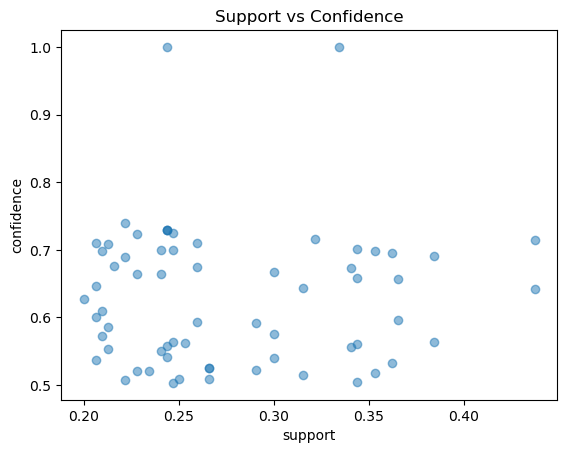

In [123]:
plt.scatter(assoc_rules4['support'], assoc_rules4['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()